In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [19]:
df = pd.read_csv('Stores.csv')
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [20]:
x = df[[ "Items_Available", "Daily_Customer_Count"]]
y = df[["Store_Sales"]]

In [21]:
x

,Items_Available,Daily_Customer_Count
0,1961,530
1,1752,210
2,1609,720
3,1748,620
4,2111,450
...,...,...
891,1910,1080
892,1663,850
893,1436,1060
894,1560,770


In [22]:
y

,Store_Sales
0,66490
1,39820
2,54010
3,53730
4,46620
...,...
891,66390
892,82080
893,76440
894,96610


In [23]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [24]:
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier.fit(x_train, y_train)

c:\Users\paxyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [26]:
y_pred= classifier.predict(x_test)
y_pred

array([49540, 36210, 35120, 37720, 35220, 46760, 35680, 58540, 48560,
       49720, 46050, 40700, 36000, 43030, 35510, 43370, 38510, 21470,
       41050, 40450, 46230, 39730, 42060, 25950, 28330, 37390, 50950,
       46230, 25950, 51700, 32260, 35220, 21830, 37390, 36160, 38890,
       49030, 49210, 24410, 32330, 34880, 34180, 37920, 44910, 48610,
       32740, 46230, 41090, 35590, 43190, 30790, 41190, 40490, 44890,
       36690, 32610, 43840, 49160, 35280, 42060, 39730, 36330, 52450,
       36160, 43190, 41090, 39580, 36160, 36350, 41680, 35280, 39460,
       59820, 46030, 37330, 49210, 50070, 43190, 36160, 50360, 51850,
       57140, 35120, 36280, 26770, 50170, 35510, 49540, 35280, 39730,
       39580, 30810, 34180, 24410, 34180, 46100, 46100, 56170, 42670,
       57140, 46380, 43370, 37390, 38660, 49030, 52450, 31940, 46100,
       35120, 33430, 49750, 35230, 43190, 49730, 44150, 38530, 21750,
       38890, 38530, 35280, 33890, 33580, 27840, 45020, 24410, 49170,
       41500, 39730,

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

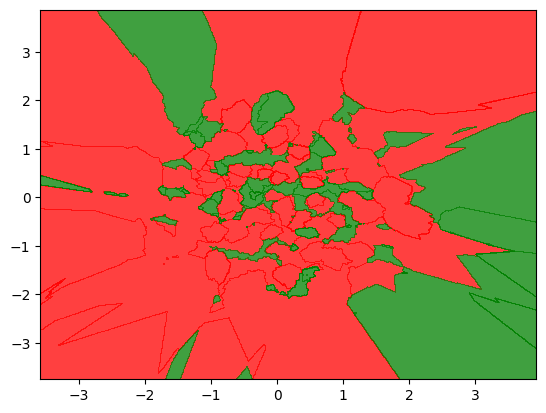

In [28]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('K-NN Algorithm (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()
